In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read data

In [2]:
fish = pd.read_csv('Fish_dataset.csv')

# EDA

In [3]:
fish.size

1113

In [4]:
fish.shape

(159, 7)

In [5]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
fish.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [7]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [9]:
fish.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

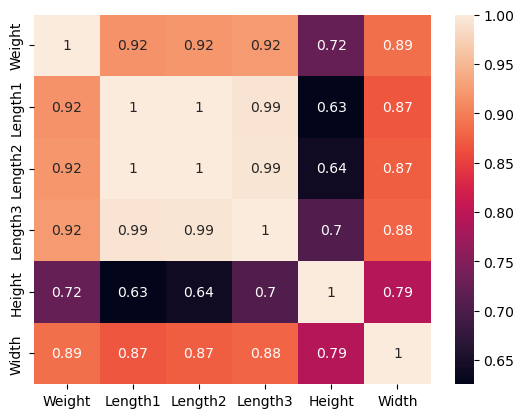

In [10]:
sns.heatmap(data= fish.corr(), annot =True)

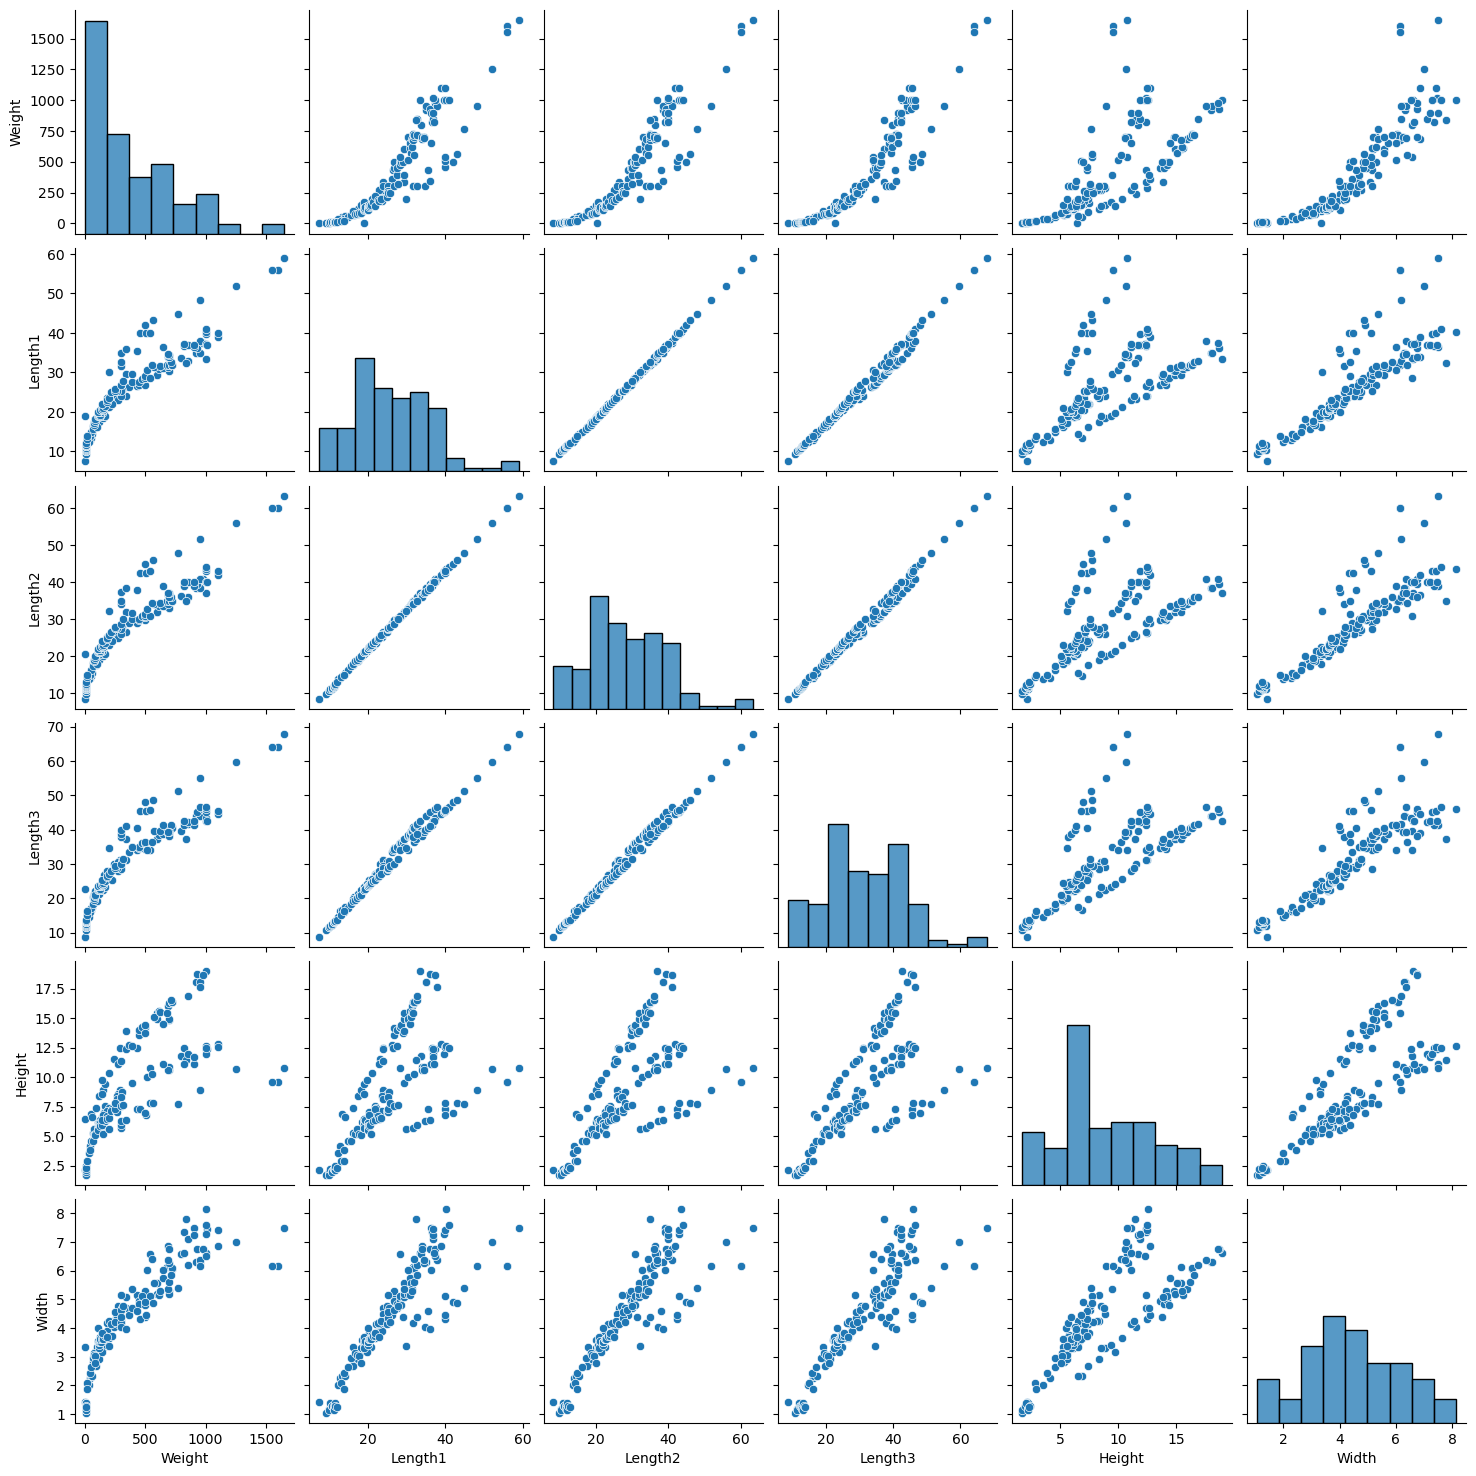

In [11]:
sns.pairplot(data = fish);

Here,we will use multiple Correlation. Because, all the columns are highly correlated with target column ie. Weight

There are No Missing values in given dataset

# Outliers

<AxesSubplot:>

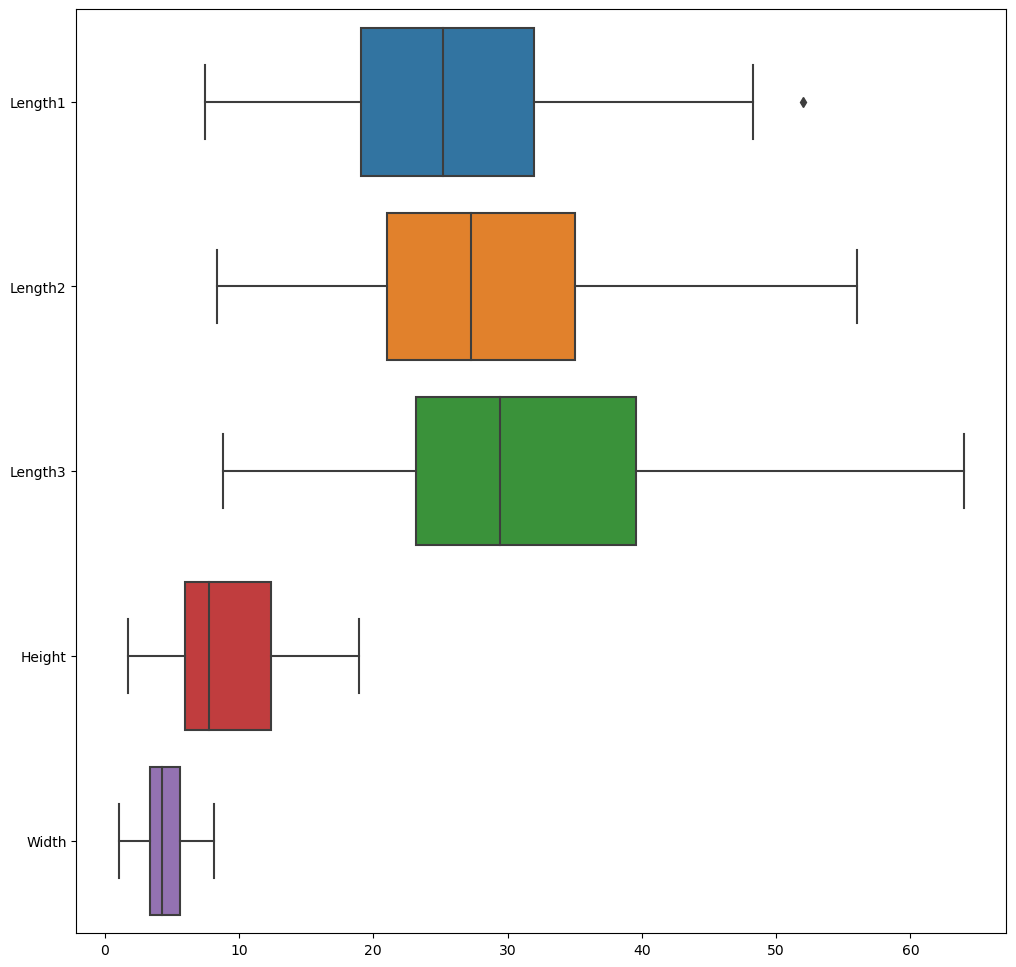

In [43]:
plt.figure(figsize = (12,12))
dd1 = fish.drop(['Weight'],axis =1)
sns.boxplot(data = dd1,orient = 'h')

In [44]:
for colname,colvals in fish.iteritems():
    if fish[colname].dtype!=object and colname!='Weight':
        Q1=fish[colname].quantile(q=0.25)
        Q3=fish[colname].quantile(q=0.75)
        IQR=Q3-Q1
        low=Q1-(1.5*IQR)
        up=Q3+(1.5*IQR)
        fish.loc[(fish[colname]<low) | (fish[colname]>up) ,colname]=fish[colname].median()
    else:
           continue

<AxesSubplot:>

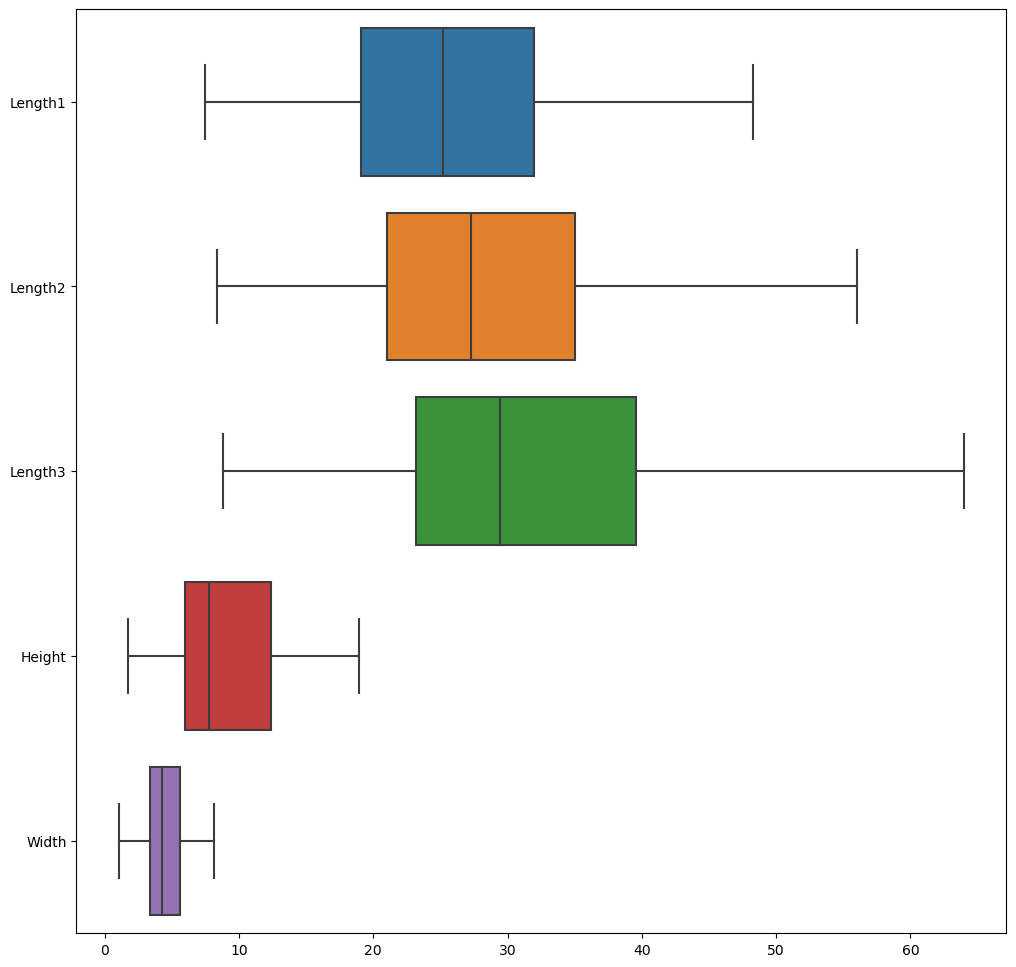

In [45]:
plt.figure(figsize = (12,12))
dd1 = fish.drop(['Weight'],axis =1)
sns.boxplot(data = dd1,orient = 'h')

# Handle Categorical data

In [46]:
cat_data = pd.get_dummies(fish['Species'],drop_first=True)
cat_data

,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
154,0,0,0,0,1,0
155,0,0,0,0,1,0
156,0,0,0,0,1,0
157,0,0,0,0,1,0


In [47]:
f1 = fish.drop('Species', axis = 1)
f1

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [48]:
final = pd.concat([cat_data,f1], axis = 1)
final.head()

,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Weight,Length1,Length2,Length3,Height,Width
0,0,0,0,0,0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,0,0,0,0,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,0,0,0,0,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,0,0,0,0,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,0,0,0,0,0,430.0,26.5,29.0,34.0,12.4440,5.1340


# Select Independent and dependent variable

In [49]:
X=final.drop('Weight',axis=1)
y = final['Weight']

In [50]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [51]:
# split the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled,y, test_size = 0.2, random_state = 42)

In [52]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()

mlr.fit(X_train,y_train)

LinearRegression()

In [53]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(scaled, mlr.coef_))

385.44472942213264


[(array([-0.27262488, -0.73735291, -0.34600334, -0.37932162, -0.31072773,
         -0.19802951, -0.26020637, -0.24587645, -0.08789329,  0.59657867,
         -0.23652895]),
  41.70127847700374),
 (array([-0.27262488, -0.73735291, -0.34600334, -0.37932162, -0.31072773,
         -0.19802951, -0.16885045, -0.15279465,  0.01926351,  0.82126055,
         -0.06657895]),
  189.0784906458306),
 (array([-0.27262488, -0.73735291, -0.34600334, -0.37932162, -0.31072773,
         -0.19802951, -0.18026994, -0.13210981,  0.01033378,  0.79734129,
          0.16579317]),
  241.71169406827084),
 (array([-0.27262488, -0.73735291, -0.34600334, -0.37932162, -0.31072773,
         -0.19802951,  0.09379782,  0.12645075,  0.22464738,  0.87977146,
          0.022621  ]),
  100.03155870461714),
 (array([-0.27262488, -0.73735291, -0.34600334, -0.37932162, -0.31072773,
         -0.19802951,  0.1166368 ,  0.12645075,  0.26929604,  0.81283498,
          0.42637127]),
  188.503494174243),
 (array([-0.27262488, -0.7373

In [56]:
y_train_pred = mlr.predict(X_train)

In [57]:
y_test_pred = mlr.predict(X_test)

In [58]:
from sklearn.metrics import r2_score

a = r2_score(y_train,y_train_pred)
b = r2_score(y_test, y_test_pred)

print('training = {} testing = {}'. format(a,b))

training = 0.9383112908990828 testing = 0.7083400898412952


In [59]:
from sklearn import metrics
# 0 means the model is perfect.  Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_test_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_test_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error :', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error: ', rootMeanSqErr )

Mean Absolute Error : 90.8324831605024
Mean Square Error: 41485.49761960778
Root Mean Square Error:  203.67989007167048


# L1 Lasso (L1 Regularized) Regression Model

In [60]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [61]:
lasso_reg.score(X_train,y_train)

0.9336810351136984

In [62]:
lasso_reg.score(X_test,y_test)

0.9320151292634816

# Using Ridge (L2 Regularized) Regression Model

In [63]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [64]:
ridge_reg.score(X_train,y_train)

0.8109268659662502

In [65]:
ridge_reg.score(X_test, y_test)

0.8909201186310418

# ElasticNet

In [66]:
from sklearn.linear_model import ElasticNet
en_reg = ElasticNet()
en_reg.fit(X_train,y_train)

ElasticNet()

In [67]:
en_reg.score(X_train,y_train)

0.7943769266175622

In [68]:
en_reg.score(X_test,y_test)

0.8787888831813008

# Conclusion:
* L1 Lasso Regression regularised the model in a generalised way with 93.20% training Score and 93.09% testing score.